In [1]:
import pyodbc
import pandas as pd

import matplotlib.pyplot as plt


In [2]:
import pyodbc
import pandas as pd

server = 'MSI'
database = 'src_data'
username = 'INFA_role_2'
password = 'abc123'
conn_str = f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

query = """
SELECT 
    ci.INDICATOR_CODE,
    ci.INDICATOR_NAME,
    co.Country_ID,
    co.Country_Code,
    co.Region,
    co.IncomeGroup,
    co.CountryName,
    fe.RECORDED_YEAR,
    fe.EMISSION
FROM dbo.DIM_INDICATOR ci
INNER JOIN dbo.FACT_CO_2_EMISSION fe ON ci.INDICATOR_ID = fe.INDICATOR_ID
INNER JOIN dbo.DIM_COUNTRY co ON fe.COUNTRY_ID = co.Country_ID
"""

try:
    conn = pyodbc.connect(conn_str)
    print("Database connection successful.")
    
    df = pd.read_sql(query, conn)
    print("Data fetched successfully.")
    
finally:
    conn.close()



Database connection successful.
Data fetched successfully.


C:\Users\mural\AppData\Local\Temp\ipykernel_18740\1785499511.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [3]:
df.head()

,INDICATOR_CODE,INDICATOR_NAME,Country_ID,Country_Code,Region,IncomeGroup,CountryName,RECORDED_YEAR,EMISSION
0,EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita),2,AFE,None,None,Africa Eastern and Southern,1990,0.982975
1,EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita),2,AFE,None,None,Africa Eastern and Southern,1991,0.942212
2,EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita),2,AFE,None,None,Africa Eastern and Southern,1992,0.907936
3,EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita),2,AFE,None,None,Africa Eastern and Southern,1993,0.909550
4,EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita),2,AFE,None,None,Africa Eastern and Southern,1994,0.913413


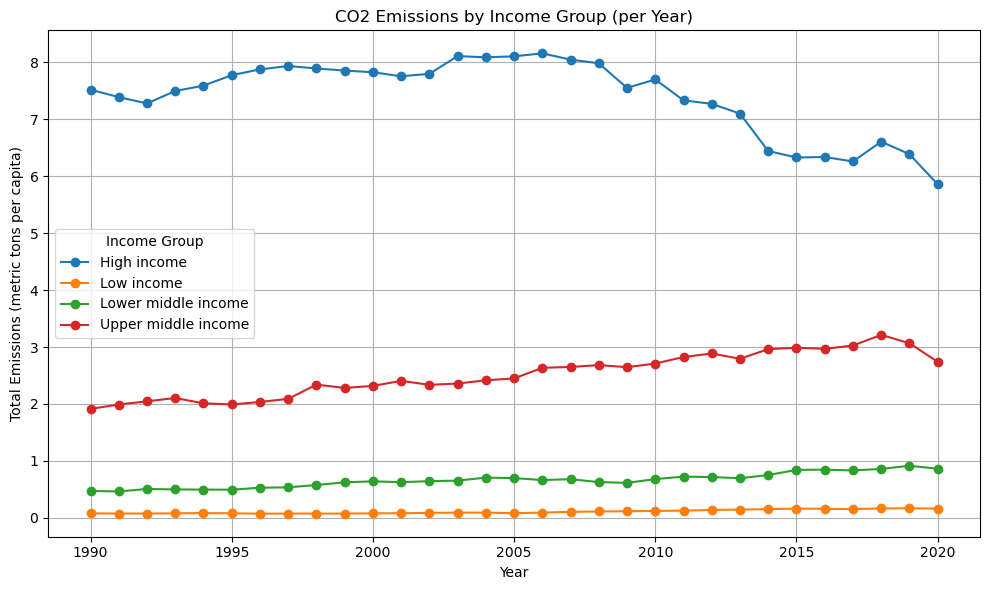

In [11]:
grouped = df.groupby(["IncomeGroup", "RECORDED_YEAR"])["EMISSION"].median().reset_index()
grouped.head()
pivot_table = grouped.pivot(index="RECORDED_YEAR", columns="IncomeGroup", values="EMISSION")

plt.figure(figsize=(10, 6))

for income_group in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[income_group], marker='o', label=income_group)

plt.title("CO2 Emissions by Income Group (per Year)")
plt.xlabel("Year")
plt.ylabel("Total Emissions (metric tons per capita)")
plt.legend(title="Income Group")
plt.grid(True)
plt.tight_layout()

plt.show()

In [5]:
grouped = df[df.RECORDED_YEAR==2020].groupby(["IncomeGroup"])["EMISSION"].sum().reset_index()
grouped.head()

,IncomeGroup,EMISSION
0,High income,452.338344
1,Low income,7.251642
2,Lower middle income,73.260252
3,Upper middle income,188.966961


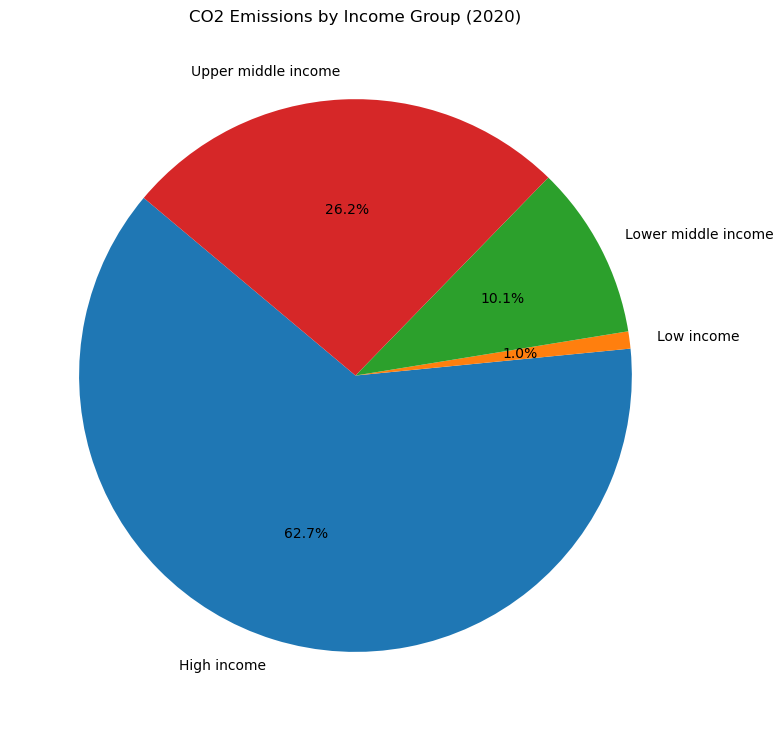

In [6]:

grouped = df[df.RECORDED_YEAR == 2020].groupby(["IncomeGroup"])["EMISSION"].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(
    grouped["EMISSION"],
    labels=grouped["IncomeGroup"],
    autopct='%1.1f%%',
    startangle=140
)
plt.title("CO2 Emissions by Income Group (2020)")
plt.tight_layout()

plt.show()


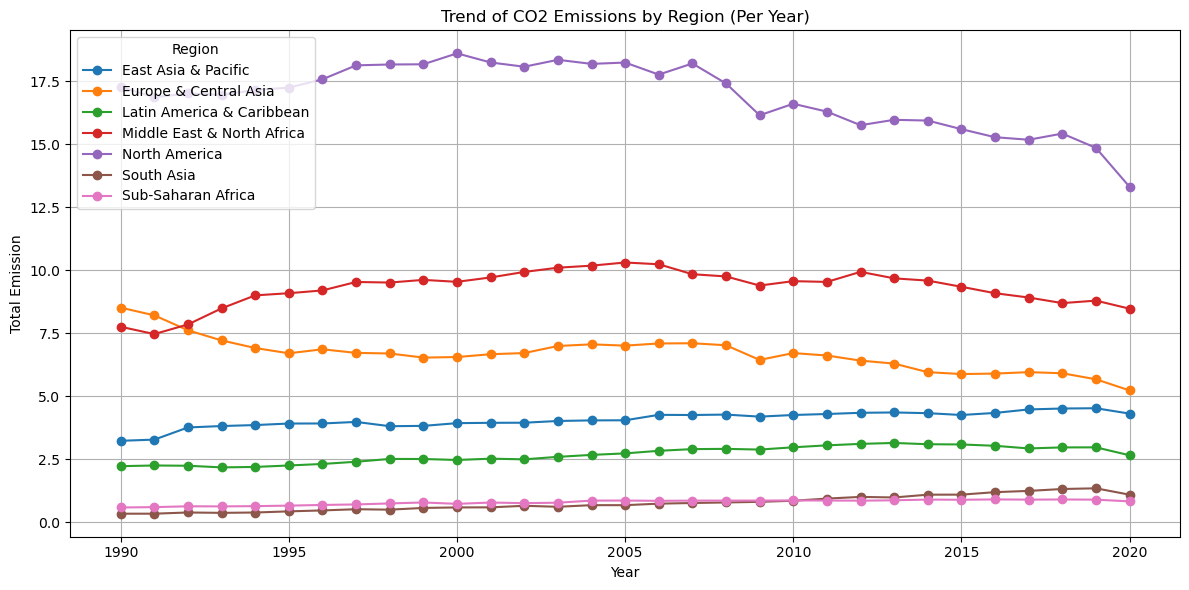

In [ ]:
grouped_region_year = df.groupby(["RECORDED_YEAR", "Region"])["EMISSION"].median().reset_index()
pivot_region = grouped_region_year.pivot(index="RECORDED_YEAR", columns="Region", values="EMISSION")


plt.figure(figsize=(12, 6))

for region in pivot_region.columns:
    plt.plot(pivot_region.index, pivot_region[region].T,  label=region,marker='o')
    
plt.title("Trend of CO2 Emissions by Region (Per Year)")
plt.xlabel("Year")
plt.ylabel("Total Emission")
plt.legend(title="Region", loc="upper left")
plt.grid(True)

plt.tight_layout()
plt.show()

In [8]:
df.groupby(["RECORDED_YEAR", "Region"])['EMISSION'].mean().reset_index()

,RECORDED_YEAR,Region,EMISSION
0,1990,East Asia & Pacific,3.237945
1,1990,Europe & Central Asia,8.522544
2,1990,Latin America & Caribbean,2.230839
3,1990,Middle East & North Africa,7.763013
4,1990,North America,17.278153
...,...,...,...
212,2020,Latin America & Caribbean,2.663882
213,2020,Middle East & North Africa,8.481052
214,2020,North America,13.316101
215,2020,South Asia,1.099134


In [9]:
pivot_region.head()

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
RECORDED_YEAR,,,,,,,
1990,3.237945,8.522544,2.230839,7.763013,17.278153,0.344673,0.591310
1991,3.285146,8.215893,2.258289,7.472766,16.872177,0.345731,0.605533
1992,3.767674,7.623416,2.247825,7.856594,17.025492,0.393071,0.638960
1993,3.823572,7.221064,2.182871,8.493983,16.965820,0.378302,0.634873
1994,3.862350,6.919069,2.200860,9.009269,17.158345,0.391983,0.644734
